In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import os

from astropy.io import fits
from astropy.table import Table, join
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

# Get UKIDSS and SDSS

This notebook
- records the data download process for UKIDSS and SDSS
- plots the overall galaxy sample features

### UKIDSS-DR9 

Survey Overview paper (Lawrence 2007):

> The survey uses the Wide Field Camera (WFCAM) on the 3.8-m United Kingdom Infra-red Telescope (UKIRT).WFCAM
has an instantaneous field of view of 0.21 deg2, considerably larger than any previous IR camera on a 4-m class telescope, along with a pixel size of 0.4 arcsec. The tip-tilt system on UKIRT delivers close to natural seeing (median size 0.6 arcsec)

> filters ZYJHK covering the wavelength range 0.83–2.37 µm

Band |λeff (µm) | Range (µm) | Width (µm)
---| --- | --- | ---
Z |0.8817 | 0.836−0.929 | 0.093
Y |1.0305 | 0.979−1.081 | 0.102
J |1.2483 | 1.169−1.328 | 0.159
H |1.6313 | 1.492−1.784 | 0.292
K|2.2010 | 2.029−2.380 | 0.351

> The wavelength limits are set by the total system transmission, and defined as 50 per cent transmission relative to the peak. Complete transmission functions are shown in Hewett et al. (2006)

> The JHK passbands are as close as possible to theMKOsystem; the Z passband is similar to the SDSS z? passband, but has a cleaner red tail. The Y passband is a new one centred at 0.97µm, which bridges the gap between Z and J. *The exact passband was designed with the aim of discriminating between high-redshift quasars and brown dwarfs (Ed: sadly, this is aimed at z = 7 quasars).*

5 - 10 second exposures. Four spaced detectors, tiled over four pointings for complete coverage. Pixel size 0.4 arcsecs. Field of view 0.207deg2 per exposure. Allowing for pointings and jittering, standard shallow images have an exposure time of 40 secs.
    
UKIDSS survey goal 9 (Lawrence):

> (ix) to clarify the relationship between quasars, ULIRGs, and
galaxy formation


DR2 paper:
> All magnitudes quoted in this paper use the Vega system described by Hewett et al. (2006). Depths, where not explicitly specified, are the total brightness of a point source for which the flux integrated in a 2′′ diameter aperture is detected at 5σ.

Tables have quality control flags under the columns ppErrBits. See the DR2 paper:
> ppErrBits and in the source tables the appro- priate filter name is appended, e.g. yppErrBits, j 1ppErrBits. The attribute is a 32-bit integer where each bit can be set to 1 to flag up to 32 dif- ferent quality issues. The quality issues are ranked in severity, with the more severe issues assigned to higher bits. Currently only five bits are set as follows: Bit 4 = the source is the offspring of deblending, Bit 6 = a bad pixel exists in the de- fault aperture (1′′ radius), Bit 16 = the source is likely to contain saturated pixels, Bit 19 = the source is likely to be either cross-talk or a real source affected by cross-talk (see D06 and W07 for details on cross-talk), Bit 22 = the source is likely to include incomplete data as a consequence of lying close to the frame boundary.




#### Large Area Survey (LAS)


LAS: Large Area Survey, 4000 sq degrees of extragalactic observations matched to the SDSS footprint
See more here: http://www.ukidss.org/surveys/surveys.html


LAS has depths of: Y=20.2, J=19.6, H=18.8, K=18.2 [source](http://wsa.roe.ac.uk/dr2plus_release.html) [paper](https://academic.oup.com/mnras/article/379/4/1599/999542#17561427) (paper quotes Y = 20.3)

UKIDSS has various cross-matching already one in DR2 (e.g. SDSS) and more later (e.g. WISE). Perhaps I can use this directly?

Lawrence:

> The LAS, when combined with the matching SDSS data, will
produce a catalogue of half a million galaxies with colours and spectra, and several million galaxies with photometric redshifts

> Field selection for the LAS was designed to have a good spread
in RA, to have a reasonable amount of sky coverage at lower decli- nations, for follow-up on ESO telescopes, to keep below the UKIRT declination limit (+60◦), all while lying with the SDSS footprint. There are three subareas.

1. The LAS equatorial block: 1908 deg2. This includes most of
SDSS stripes from 9 to 16. 
2. The LAS northern block: 1908 deg2. This includes most of
SDSS stripes from 26 to 33. 
3. The LAS southern stripe: 212 deg2. This is a section of SDSS
stripe 82, extending over −25◦ < RA < +60◦,−1.◦25 < Dec.<
+1.◦25. 

An interesting note on color: 
> Because LAS uses a large fraction of the UKIDSS time, it would obviously not demand the best seeing. Colours are very important, and some objects are variable, which argues for do- ing all four bands when each sky position is visited; on the other hand, the Y and J observations require darker sky than the H and K observations. MSBs (hour-long observation blocks) were then grouped so that H and K would be done together, and Y and J done separately. However, the queue is monitored and adjusted to try to make sure that the YJ and HK observations are not too far apart. Our current plan is to prioritize uniformity and achieve the limits given in Section 2. Thus, in poorer seeing conditions the integration times are increased to compensate.

*TODO: completeness in terms of luminosity?*




#### Data Releases 

The latest UKIDSS release is DR11. 

Only the data releases up to DR2 have an attached 'official' summary paper. 

Each data release adds sky coverage up to (at least) DR9. Ongoing coverage is shown against the final 'ideal' coverage (matched to SDSS) at the url dr{n}_last.html.

http://wsa.roe.ac.uk/dr10_las.html
http://wsa.roe.ac.uk/dr9_las.html
http://wsa.roe.ac.uk/dr8_las.html


The contents of each release are cumulative and described here: http://wsa.roe.ac.uk/releasehistory.html


DR9 appears to be the last significant data release, in 2011. 

DR10 is very similar to DR9. The only relevant change from DR9 is the inclusion of WISE all-sky neighbour tables (previously used WISE_prelim) [source](http://wsa.roe.ac.uk/dr10plus_release.html). The DR10 [url](http://wsa.roe.ac.uk/dr10_las.html) gives no coverage table and, by eye, coverage seems close to equivalent (except in J-2). DR11 only adds UDS (ultra-deep survey) data [source](http://wsa.roe.ac.uk/dr11plus_release.html).

As of DR9 (last reported table at the URL system above) the coverage was:

Filter | Area (sq deg)
---| ---
Y | 3387.8
J1 |3404.5
J2 | 260.1
H | 3495.1
K | 3518.5
Y+J+H+K | 3176.7
Y/J/H/K | 3597.9


> For standard UKIDSS products...a relatively simple spatial pairing algorithm is used. A pairing radius of roughly 1 arcsec (varying between sub- surveys) is used, several times larger than the astrometric accuracy (0.1 arcsec), in order to allow merging of moving objects between epochs. 

> ...follows SDSS practice in storing a neighbour table for every source, so that much more flexible source matching algorithms can be applied later.

#### Galaxy Zoo

70,000 UKIDSS galaxy images have been classified for morphology by Galaxy Zoo - [finishing blog post](https://blog.galaxyzoo.org/2014/05/29/finished-with-galaxy-zoo-ukidss/). As far as I can see (Google Scholar), these morphologies were never released. **If they're in a decent state, this could be an excellent resource - IR morphology!**

#### Data access

A brilliant quote from Lawrence: 

> Raw data are shipped by tape on
a weekly basis from Hawaii to Cambridge

UKIDSS allows for [SQL access](http://wsa.roe.ac.uk/dbaccess.html). The most relevant table is LASsources. For extended sources, the [recommended view](http://wsa.roe.ac.uk/www/wsa_browser.html)/views/lasExtendedSource) is: 


`SELECT *
FROM   lasSource
/*     Seamless selection of unique sources: */
WHERE  (priOrSec <= 0 or priOrSec = frameSetID)
/*     Good quality, extended detection in J1, H and K: */
AND    (j_1Class = +1 OR j_1Class = -3) AND j_1ppErrBits < 256
AND    (hClass   = +1 OR hClass = -3) AND hppErrBits < 256
AND    (kClass   = +1 OR kClass = -3) AND kppErrBits < 256
/*     Good quality, extended detection, or no detection, in Y and J2: */
AND    (yClass   = +1 OR yClass = -3 OR yClass = -9999) AND yppErrBits < 256
AND    (j_2Class = +1 OR j_2Class = -3 OR j_2Class = -9999) AND j_2ppErrBits < 256`


The table ExternalSurvey table describes the external surveys (e.g. SDSS) held within the UKIDSS database. 

The table ExternalSurveyTable lists sources from external surveys, but documentation is poor.

SDSS DR8 has been cross-matched into LAS - the table is `lasSourceXDR8PhotoObj`. This gives the angular separation of the sources and the DR8 ObjID. This can be filtered for galaxies (i.e. not stars) and primary/secondary.

Also cross-matched: FIRST, GALEX,IRAS, NVSS, ROSAT, WISE (but perhaps only point sources?).

However, it's not obvious how to use the SQL form to search against **another** database. They do provide a [crossmatch form](http://wsa.roe.ac.uk/crossID_notes.html) that searches against a set of user-provided co-ordinates, but only up to a limit of 50,000. It seems easier to use a third party service.


## OSSY - improved SDSS spectral lines

OSSY improves on the DR7 absorbtion and emission line measurements vs. the original DR7 and the JHU-MPA re-release.

OSSY is available as several large FITS tables from [here](http://gem.yonsei.ac.kr/~ksoh/wordpress/).

OSSY includes 
- the stellar redshift and velocity dispersion found as part of the fitting process
- The quality of the spectra and the continuum fit, measured by S/sN and rN/sN (see Sec. 3)
- For each emission line:
    - Observed and de-reddened fluxes and equiv. widths
    - A/N ratio describing how well the line is detected (see Sec. 2.2)
    - Nsig (?)
    - Redshift and EW, for recombination and forbidden lines
    - Instellar redenning Av, including nebular component Av,neb
    - Flag for broad line region Y/N
- Absorbtion line measurements for specific indices. "Only useful for S/sN > 30"

> All the previously listed redshift, velocity dispersion, flux,
equivalent width, and reddening values are **also accompanied by their corresponding formal uncertainties**




#### Data Access

OSSY is a manageable size - around 1GB total. OSSY is provided as several FITS tables.

In [3]:
ossy_dir = 'catalogs/ossy/raw'

In [4]:
emission_flux = Table.read(os.path.join(ossy_dir, 'OSSY_emission_flux_errors.fits'))

Emission flux contains 
- intrinsic (i.e. after accounting for reddenning) emission line measurements 
- 'formal' errors on those intrinsic measurements

In [11]:
emission_flux.colnames  

['SDSS_ID',
 'VEL_BALMER',
 'VEL_BALMER_E',
 'VEL_FORBIDDEN',
 'VEL_FORBIDDEN_E',
 'SIG_BALMER',
 'SIG_BALMER_E',
 'SIG_FORBIDDEN',
 'SIG_FORBIDDEN_E',
 'EBV_STAR',
 'EBV_GAS',
 'E_EBV_STAR',
 'E_EBV_GAS',
 'VEL_STARS',
 'VEL_STARS_E',
 'SIGMA_STARS',
 'SIGMA_STARS_E',
 'HEII_3203',
 'NEV_3345',
 'NEV_3425',
 'OII_3726',
 'OII_3728',
 'NEIII_3868',
 'NEIII_3967',
 'H5_3889',
 'HE_3970',
 'HD_4101',
 'HG_4340',
 'OIII_4363',
 'HEII_4685',
 'ARIV_4711',
 'ARIV_4740',
 'HB_4861',
 'OIII_4958',
 'OIII_5006',
 'NI_5197',
 'NI_5200',
 'HEI_5875',
 'OI_6300',
 'OI_6363',
 'NII_6547',
 'HA_6562',
 'NII_6583',
 'SII_6716',
 'SII_6730',
 'ARIII_7135',
 'HEII_3203_ERROR',
 'NEV_3345_ERROR',
 'NEV_3425_ERROR',
 'OII_3726_ERROR',
 'OII_3728_ERROR',
 'NEIII_3868_ERROR',
 'NEIII_3967_ERROR',
 'H5_3889_ERROR',
 'HE_3970_ERROR',
 'HD_4101_ERROR',
 'HG_4340_ERROR',
 'OIII_4363_ERROR',
 'HEII_4685_ERROR',
 'ARIV_4711_ERROR',
 'ARIV_4740_ERROR',
 'HB_4861_ERROR',
 'OIII_4958_ERROR',
 'OIII_5006_ERROR',
 '

In [6]:
emission_ew = Table.read(os.path.join(ossy_dir, 'OSSY_emission_aon_ew_sky.fits'))

Emission EW contains, for each emission line:
- equivalent width
- A over N: not actually described in the paper?

In [10]:
emission_ew.colnames

['SDSS_ID',
 'AON_HEII_3203',
 'AON_NEV_3345',
 'AON_NEV_3425',
 'AON_OII_3726',
 'AON_OII_3728',
 'AON_NEIII_3868',
 'AON_NEIII_3967',
 'AON_H5_3889',
 'AON_HE_3970',
 'AON_HD_4101',
 'AON_HG_4340',
 'AON_OIII_4363',
 'AON_HEII_4685',
 'AON_ARIV_4711',
 'AON_ARIV_4740',
 'AON_HB_4861',
 'AON_OIII_4958',
 'AON_OIII_5006',
 'AON_NI_5197',
 'AON_NI_5200',
 'AON_HEI_5875',
 'AON_OI_6300',
 'AON_OI_6363',
 'AON_NII_6547',
 'AON_HA_6562',
 'AON_NII_6583',
 'AON_SII_6716',
 'AON_SII_6730',
 'AON_ARIII_7135',
 'EW_HEII_3203',
 'EW_NEV_3345',
 'EW_NEV_3425',
 'EW_OII_3726',
 'EW_OII_3728',
 'EW_NEIII_3868',
 'EW_NEIII_3967',
 'EW_H5_3889',
 'EW_HE_3970',
 'EW_HD_4101',
 'EW_HG_4340',
 'EW_OIII_4363',
 'EW_HEII_4685',
 'EW_ARIV_4711',
 'EW_ARIV_4740',
 'EW_HB_4861',
 'EW_OIII_4958',
 'EW_OIII_5006',
 'EW_NI_5197',
 'EW_NI_5200',
 'EW_HEI_5875',
 'EW_OI_6300',
 'EW_OI_6363',
 'EW_NII_6547',
 'EW_HA_6562',
 'EW_NII_6583',
 'EW_SII_6716',
 'EW_SII_6730',
 'EW_ARIII_7135',
 'FLAG_HEII_3203',
 'FLAG

In [13]:
continuum_qa = Table.read(os.path.join(ossy_dir, 'OSSY_quality_assessment_continuum.fits'))
continuum_qa.colnames

['SDSS_ID', 'RN_SN', 'S_SN', 'NSIGMA']

S_Sn is the typical measure: signal over the formal statistical noise. 

Rn measures the residual noise, and so Rn / Sn measures if the size of the actual residuals matches the expected residuals from statistical noise. Rn / Sn of around 1 indicates a good continuum fit.

N sigma measures whether a galaxy is an outlier (i.e. has been poorly matched to a continuum template) or is merely well-matched yet somewhat different due to random fluctuations.

In [14]:
emission_qa = Table.read(os.path.join(ossy_dir, 'OSSY_quality_assessment_emission.fits'))
emission_qa.colnames

['SDSS_ID',
 'NSIGMA_OII_3726_3729',
 'NSIGMA_HB_4861',
 'NSIGMA_OIII_5007',
 'NSIGMA_OI_6300',
 'NSIGMA_OI_6363',
 'NSIGMA_HA_NII_6547_6583',
 'NSIGMA_SII_6716_6730']

N sigma for emission lines is analagous to the N sigma for continuum lines. rN/sN is computed in a small region around the line, carefully sized according to the line width. Given a width, there is a typical distribution of rN/sN for good fits. N sigma measures deviation from this typical rN/sN distribution. 

Interpretation: is the line unusual but the fit is probably good, or is it truly an outlier versus the measured fit? 

In [15]:
ossy_sdss = Table.read(os.path.join(ossy_dir, 'OSSY_SDSS_parameters.fits'))
ossy_sdss.colnames

['SDSS_ID', 'RA', 'DEC', 'REDSHIFT', 'PLATE', 'MJD', 'FIBERID']

This table includes the basic sdss info and fibre id for the spectra. Note that it's not required to match into SDSS: the SDSS ID is sufficient and included as the primary key for each table.

In [16]:
ossy = join(emission_flux, emission_ew, keys='SDSS_ID', join_type='inner')
ossy = join(ossy, continuum_qa, keys='SDSS_ID', join_type='inner')
ossy = join(ossy, emission_qa, keys='SDSS_ID', join_type='inner')
ossy = join(ossy, ossy_sdss, keys='SDSS_ID', join_type='inner')

In [17]:
assert len(ossy) == len(emission_flux) == len(emission_ew) == len(continuum_qa) == len(emission_qa) == len(ossy_sdss)

In [ ]:
# make everything lowercase
# ossy = ossy.rename(columns=dict(zip(ossy.columns.values, list(map(lambda x: x.lower(), ossy.columns.values)))))

In [18]:
ossy.colnames

['SDSS_ID',
 'VEL_BALMER',
 'VEL_BALMER_E',
 'VEL_FORBIDDEN',
 'VEL_FORBIDDEN_E',
 'SIG_BALMER',
 'SIG_BALMER_E',
 'SIG_FORBIDDEN',
 'SIG_FORBIDDEN_E',
 'EBV_STAR',
 'EBV_GAS',
 'E_EBV_STAR',
 'E_EBV_GAS',
 'VEL_STARS',
 'VEL_STARS_E',
 'SIGMA_STARS',
 'SIGMA_STARS_E',
 'HEII_3203',
 'NEV_3345',
 'NEV_3425',
 'OII_3726',
 'OII_3728',
 'NEIII_3868',
 'NEIII_3967',
 'H5_3889',
 'HE_3970',
 'HD_4101',
 'HG_4340',
 'OIII_4363',
 'HEII_4685',
 'ARIV_4711',
 'ARIV_4740',
 'HB_4861',
 'OIII_4958',
 'OIII_5006',
 'NI_5197',
 'NI_5200',
 'HEI_5875',
 'OI_6300',
 'OI_6363',
 'NII_6547',
 'HA_6562',
 'NII_6583',
 'SII_6716',
 'SII_6730',
 'ARIII_7135',
 'HEII_3203_ERROR',
 'NEV_3345_ERROR',
 'NEV_3425_ERROR',
 'OII_3726_ERROR',
 'OII_3728_ERROR',
 'NEIII_3868_ERROR',
 'NEIII_3967_ERROR',
 'H5_3889_ERROR',
 'HE_3970_ERROR',
 'HD_4101_ERROR',
 'HG_4340_ERROR',
 'OIII_4363_ERROR',
 'HEII_4685_ERROR',
 'ARIV_4711_ERROR',
 'ARIV_4740_ERROR',
 'HB_4861_ERROR',
 'OIII_4958_ERROR',
 'OIII_5006_ERROR',
 '

In [19]:
ossy[0]

<Row index=0>
     SDSS_ID         VEL_BALMER      VEL_BALMER_E    VEL_FORBIDDEN   VEL_FORBIDDEN_E       SIG_BALMER       SIG_BALMER_E      SIG_FORBIDDEN    SIG_FORBIDDEN_E         EBV_STAR             EBV_GAS            E_EBV_STAR           E_EBV_GAS        VEL_STARS     VEL_STARS_E       SIGMA_STARS      SIGMA_STARS_E    HEII_3203 NEV_3345 NEV_3425      OII_3726          OII_3728         NEIII_3868        NEIII_3967         H5_3889            HE_3970          HD_4101           HG_4340          OIII_4363          HEII_4685          ARIV_4711         ARIV_4740           HB_4861           OIII_4958         OIII_5006          NI_5197      NI_5200      HEI_5875          OI_6300            OI_6363           NII_6547           HA_6562            NII_6583          SII_6716           SII_6730         ARIII_7135    HEII_3203_ERROR NEV_3345_ERROR NEV_3425_ERROR   OII_3726_ERROR    OII_3728_ERROR   NEIII_3868_ERROR   NEIII_3967_ERROR   H5_3889_ERROR     HE_3970_ERROR      HD_4101_ERROR     HG_4340_ERROR   OIII_4363_ERROR   HEII_4685_ERROR    ARIV_4711_ERROR   ARIV_4740_ERROR    HB_4861_ERROR     OIII_4958_ERROR    OIII_5006_ERROR     NI_5197_ERROR    NI_5200_ERROR  HEI_5875_ERROR    OI_6300_ERROR      OI_6363_ERROR      NII_6547_ERROR     HA_6562_ERROR     NII_6583_ERROR    SII_6716_ERROR    SII_6730_ERROR   ARIII_7135_ERROR  AON_HEII_3203 AON_NEV_3345 AON_NEV_3425    AON_OII_3726      AON_OII_3728     AON_NEIII_3868    AON_NEIII_3967      AON_H5_3889        AON_HE_3970       AON_HD_4101       AON_HG_4340      AON_OIII_4363      AON_HEII_4685      AON_ARIV_4711       AON_ARIV_4740       AON_HB_4861       AON_OIII_4958      AON_OIII_5006       AON_NI_5197     AON_NI_5200    AON_HEI_5875       AON_OI_6300         AON_OI_6363        AON_NII_6547      AON_HA_6562       AON_NII_6583      AON_SII_6716      AON_SII_6730     AON_ARIII_7135  EW_HEII_3203 EW_NEV_3345 EW_NEV_3425    EW_OII_3726        EW_OII_3728       EW_NEIII_3868      EW_NEIII_3967        EW_H5_3889         EW_HE_3970         EW_HD_4101        EW_HG_4340         EW_OIII_4363       EW_HEII_4685        EW_ARIV_4711        EW_ARIV_4740        EW_HB_4861       EW_OIII_4958      EW_OIII_5006        EW_NI_5197     EW_NI_5200    EW_HEI_5875         EW_OI_6300         EW_OI_6363       EW_NII_6547        EW_HA_6562        EW_NII_6583       EW_SII_6716       EW_SII_6730      EW_ARIII_7135    FLAG_HEII_3203 FLAG_NEV_3345 FLAG_NEV_3425 FLAG_OII_3726 FLAG_OII_3728 FLAG_NEIII_3868 FLAG_NEIII_3967 FLAG_H5_3889 FLAG_HE_3970 FLAG_HD_4101 FLAG_HG_4340 FLAG_OIII_4363 FLAG_HEII_4685 FLAG_ARIV_4711 FLAG_ARIV_4740 FLAG_HB_4861 FLAG_OIII_4958 FLAG_OIII_5006 FLAG_NI_5197 FLAG_NI_5200 FLAG_HEI_5875 FLAG_OI_6300 FLAG_OI_6363 FLAG_NII_6547 FLAG_HA_6562 FLAG_NII_6583 FLAG_SII_6716 FLAG_SII_6730 FLAG_ARIII_7135  RN_SN    S_SN   NSIGMA NSIGMA_OII_3726_3729 NSIGMA_HB_4861 NSIGMA_OIII_5007 NSIGMA_OI_6300 NSIGMA_OI_6363 NSIGMA_HA_NII_6547_6583 NSIGMA_SII_6716_6730      RA         DEC         REDSHIFT     PLATE   MJD   FIBERID
     bytes18          float64          float64          float64          float64            float64           float64            float64           float64             float64              float64             float64              float64          float64        float64           float64           float64        float64  float64  float64       float64           float64           float64           float64           float64            float64          float64           float64           float64            float64            float64           float64            float64            float64           float64           float64      float64      float64           float64            float64           float64            float64            float64           float64            float64           float64          float64        float64        float64          float64           float64           float64            float64           float64           float64            float64           float64          fl

In [21]:
joined_dir = 'catalogs/ossy/joined'
if not os.path.isdir(joined_dir):
    os.mkdir(joined_dir)
# ossy.to_csv(os.path.join(joined_dir, 'ossy_joined.csv'), index=False)  # takes a minute, large csv
ossy.write(os.path.join(joined_dir, 'ossy_joined.fits'), overwrite=True)

In [ ]:
ossy['fiberid']

The OSSY creators + Kevin Schawinski have a 2015 [catalog](http://gem.yonsei.ac.kr/~ksoh/wordpress/?page_id=138) of Type 1 (broad line) AGN, selected using OSSY and other surveys. This might be a great starting place and test case for forward modelling.

## SDSS Derived Galaxy Properties

OSSY gives excellent spectral lines. However, we'd also like to know some basic properties - color, mass, etc.

The NSA Atlas (v1_0_1, latest) is used as the definitive local galaxy list for Galaxy Zoo (SDSS) and has a wealth of interesting derived data products. The schema is [here](http://skyserver.sdss.org/dr13/en/help/browser/browser.aspx#&&history=description+nsatlas+U). 

v1_0_1 is part of DR13, while OSSY is part of DR7. However, we can still match on fibre_id - the id of the plate hole used to take the spectrum.


*[MPA-JHU](https://wwwmpa.mpa-garching.mpg.de/SDSS/DR7/) includes some derived data, but not to the same extent as the NSA.*

*SDSS DR7 has fundamental imaging properties listed [here](http://classic.sdss.org/dr7/).*


## Download Approach

Neither SDSS nor UKIDSS has a complete copy of the other on their servers. Therefore, I need to use remote access to BOTH services and then perform a join.


I tried downloading UKIDSS and SDSS via the CDS X-Match service available from cdsxmatch.u-strasbg.fr/xmatch. The latest available catalogs on X-Match via Vizier were UKIDSS-DR9 LAS+GCS+DXS and SDSS DR12. However, the download fell over above a handful of rows.


**Current approach:**
1. Load the NSA into Topcat from FITS (with useful columns only?)
2. Get UKIDSS cross-matched (5 arcsecs) with NSA via Topcat remote Vizier crossmatch (X button)
3. Locally match (matchsticks button) NSA/UKIDSS and OSSY_joined (5 arcsecs)

The UKIDSS table used was `UKIDSS-DR9 LAS` on Vizier, available from [here](http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=II/319/las9) with a schema.

There's 185,000 galaxies and 305 columns - let's narrow down to the interesting ones

### NSA

In [44]:
general = ['fibreid', 'iauname', 'ra', 'dec', 'plug_ra', 'plug_dec', 'z', 'survey', 'programname']



bands = ['f', 'n', 'u', 'g', 'r', 'i', 'z']
petro_mags =  ['elpetro_absmag_{}' for band in bands]

geometry = [
    'elpetro_ba',  # Axis ratio used for elliptical apertures
    'elpetro_phi',  # Position angle (east of north) used for elliptical apertures 
    'elpetro_theta',  # Elliptical SDSS-style Petrosian radius (r-band, with correction)
    'petro_theta',  # Azimuthally averaged SDSS-style Petrosian radius (derived from r band)
    'petro_th50',  # Azimuthally averaged SDSS-style Petrosian 50% light radius (derived from r band)
    'petro_th90',
    'petro_phi50',  # Angle (E of N) from Stokes parameters at 50% light radius(based on r-band)
    'petro_phi90',
    'petro_ba50',  # Axis ratio b/a from Stokes parameters at 50% light radius (based on r-band)
    'petro_ba90'
] 

derived = [
    'elpetro_mass',  # Stellar mass from K-correction fit (use with caution) for elliptical Petrosian fluxes
    'elpetro_b300',  # Star-formation rate b-parameter (current over past average) for last 300 Myrs (from K-correction fit, use with caution) for elliptical Petrosian fluxes
    'elpetro_b1000',  # Star-formation rate b-parameter (current over past average) for last 1 Gyrs (from K-correction fit, use with caution) for elliptical Petrosian fluxes
    'elpetro_mets'  # Metallicity from K-correction fit (use with caution) for elliptical Petrosian fluxes
]

fiber_flux = ['fiber_flux_{}' for band in bands]

useful_nsa_cols = general + petro_mags + geometry + derived

### UKIDSS

In [86]:
identity = [
    'ULAS',
    'RAJ2000',
    'DEJ2000',
    'ID',  # Unique ID of this merged detection (sourceID) ,
    'mergedClass',  # Source class: -3 = probable (70-90%) galaxy, -2 = probable (70-90%) star, -1 = star, 0 = noise, 1 = galaxy. Renamed from cl on schema?
    'pG'  # probability of being a galaxy
]

magnitudes = [
    'Ymag',
    'Jmag1',
    'Jmag2',
    'Hmag',
    'Kmag'
]

magnitude_errors  = list(map(lambda x: 'e_' + x, magnitudes))

useful_ukidss_cols = identity + magnitudes + magnitude_errors

### OSSY

We want everything from OSSY.

In [28]:
temp_ossy = Table.read('catalogs/ossy/joined/ossy_joined.fits')
useful_ossy_cols = ossy.colnames
del temp_ossy

In [45]:
all_useful_cols = list(map(lambda x: x.upper(), useful_nsa_cols + useful_ukidss_cols + useful_ossy_cols))

In [39]:
print(all_useful_cols)

['FIBREID', 'IAUNAME', 'RA', 'DEC', 'PLUG_RA', 'PLUG_DEC', 'Z', 'SURVEY', 'PROGRAMNAME', 'ELPETRO_ABSMAG_{}', 'ELPETRO_ABSMAG_{}', 'ELPETRO_ABSMAG_{}', 'ELPETRO_ABSMAG_{}', 'ELPETRO_ABSMAG_{}', 'ELPETRO_ABSMAG_{}', 'ELPETRO_ABSMAG_{}', 'ELPETRO_BA', 'ELPETRO_PHI', 'ELPETRO_THETA', 'PETRO_THETA', 'PETRO_TH50', 'PETRO_TH90', 'PETRO_PHI50', 'PETRO_PHI90PETRO_BA50', 'PETRO_BA90', 'ELPETRO_MASS', 'ELPETRO_B300', 'ELPETRO_B1000', 'ELPETRO_METS', 'ULAS', 'RAJ2000', 'DEJ2000', 'ID', 'CL', 'PG', 'YMAG', 'JMAG1', 'JMAG2', 'HMAG', 'KMAG', 'E_YMAG', 'E_JMAG1', 'E_JMAG2', 'E_HMAG', 'E_KMAG', 'SDSS_ID', 'VEL_BALMER', 'VEL_BALMER_E', 'VEL_FORBIDDEN', 'VEL_FORBIDDEN_E', 'SIG_BALMER', 'SIG_BALMER_E', 'SIG_FORBIDDEN', 'SIG_FORBIDDEN_E', 'EBV_STAR', 'EBV_GAS', 'E_EBV_STAR', 'E_EBV_GAS', 'VEL_STARS', 'VEL_STARS_E', 'SIGMA_STARS', 'SIGMA_STARS_E', 'HEII_3203', 'NEV_3345', 'NEV_3425', 'OII_3726', 'OII_3728', 'NEIII_3868', 'NEIII_3967', 'H5_3889', 'HE_3970', 'HD_4101', 'HG_4340', 'OIII_4363', 'HEII_4685', 'A

## Access the Downloaded Data

In [ ]:
data = Table.read('catalogs/nsa_v1_0_1_ossy_ukidss_dr9_las.fits')

In [5]:
n_bins = 50

Text(0,0.5,'Galaxy Count')

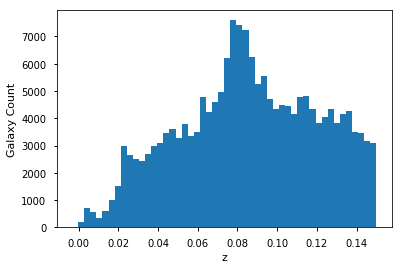

In [6]:
plt.hist(data['Z'], bins=n_bins)
plt.xlabel('z')
plt.ylabel('Galaxy Count')

In [7]:
# TODO curious bump? Perhaps an artifact of spectroscopic selection.

In [8]:
pd.Series(data['PROGRAMNAME']).value_counts()

b'legacy                     '    181104
b'                           '       952
b'southern                   '       477
b'boss                       '       271
b'commissioning              '        46
b'lowz                       '        34
b'preboss                    '        33
b'lowz_lrg                   '        32
b'lowz_loveday               '         2
b'seguefaint                 '         2
b'segue2                     '         2
b'photoz                     '         1
dtype: int64

In [9]:
# TODO filter to only 'legacy' galaxies for simplicity

In [10]:
def remove_bad_values(x):
    return x[(~np.isnan(x)) & (np.isfinite(x))]

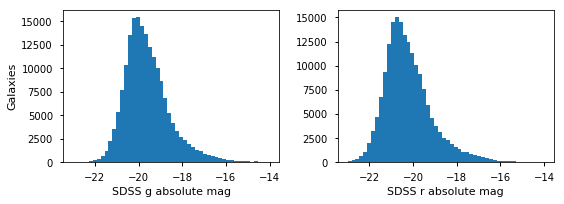

In [68]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))

g_band_mags = np.array(data['ELPETRO_ABSMAG'])[:, 3] # g is NSA 4th value: FNugriz
g_band_mags = remove_bad_values(g_band_mags)
g_band_mags = g_band_mags[(g_band_mags < -14) & (g_band_mags > -23)]  # remove crazy tails

r_band_mags = np.array(data['ELPETRO_ABSMAG'])[:, 4] # r is NSA 5th value: FNugriz
r_band_mags = remove_bad_values(r_band_mags)
r_band_mags = r_band_mags[(r_band_mags < -14) & (r_band_mags > -23)]  # remove crazy tails

axes[0].set_ylabel('Galaxies')

axes[0].hist(g_band_mags, bins=n_bins)
axes[0].set_xlabel('SDSS g absolute mag')


axes[1].hist(r_band_mags, bins=n_bins)
axes[1].set_xlabel('SDSS r absolute mag')
# axes[1].axvline(17.77, c='r')

fig.tight_layout()

In [77]:
from astropy.cosmology import WMAP9 as cosmo

data['DISTANCE_MODULUS'] = cosmo.distmod(data['Z'])
data['DISTANCE_MODULUS_LIST'] = np.array(list(map(lambda x: [x for n in range(7)], data['DISTANCE_MODULUS'])))
data['ELPETRO_APPARENT_MAG'] = data['ELPETRO_ABSMAG'] + data['DISTANCE_MODULUS_LIST']

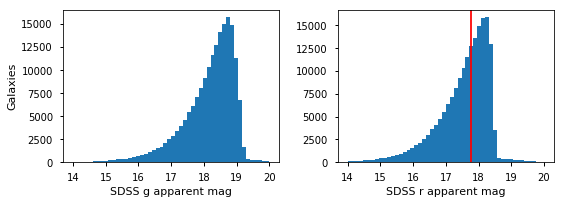

In [98]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))

g_band_mags = np.array(data['ELPETRO_APPARENT_MAG'])[:, 3] # g is NSA 4th value: FNugriz
g_band_mags = remove_bad_values(g_band_mags)
g_band_mags = g_band_mags[(g_band_mags > 14) & (g_band_mags < 20)]  # remove crazy tails

r_band_mags = np.array(data['ELPETRO_APPARENT_MAG'])[:, 4] # r is NSA 5th value: FNugriz
r_band_mags = remove_bad_values(r_band_mags)
r_band_mags = r_band_mags[(r_band_mags > 14) & (r_band_mags < 20)]  # remove crazy tails

axes[0].set_ylabel('Galaxies')

axes[0].hist(g_band_mags, bins=n_bins)
axes[0].set_xlabel('SDSS g apparent mag')


axes[1].hist(r_band_mags, bins=n_bins)
axes[1].set_xlabel('SDSS r apparent mag')
axes[1].axvline(17.77, c='r')

fig.tight_layout()

Perhaps the sudden drop is the depth limit of UKIDSS, or perhaps the spectroscopic selection cut (not at 17.77, if so)

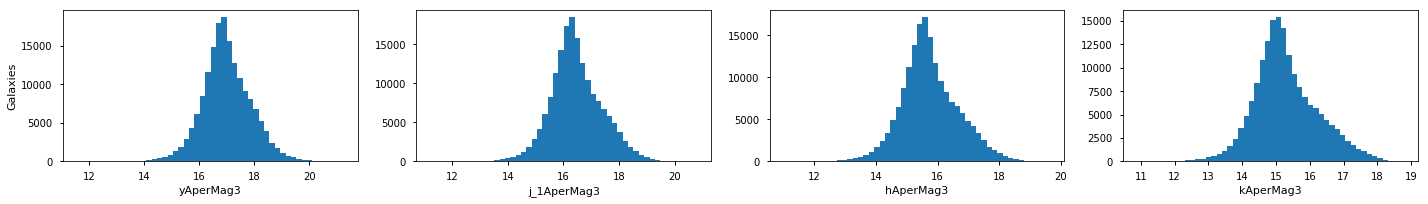

In [97]:
# TODO magnitudes in UKIDSS bands

magnitudes = [
    'Ymag',
    'Jmag1',
    'Jmag2',
    'Hmag',
    'Kmag'
]

ukidss_cols = [
    'JName',
    'ra_xmatch',
    'dec_xmatch',
    'yAperMag3',
    'j_1AperMag3',
    'hAperMag3',
    'kAperMag3',
    'yAperMag3Err',
    'j_1AperMag3Err',
    'hAperMag3Err',
    'kAperMag3Err',
    'sourceID',
    'mode',
    'epoch',
    'mergedClass',
    'angDist',
    'SDSS_ID'
]


apparent_mag_bands = [
    'yAperMag3',
    'j_1AperMag3',
    'hAperMag3',
    'kAperMag3',
]

fig, axes = plt.subplots(ncols=len(apparent_mag_bands), figsize=(20, 3))
for axes_n, mag in enumerate(apparent_mag_bands):
    axes[axes_n].hist(remove_bad_values(data[mag]), bins=50)
    axes[axes_n].set_xlabel(mag)
axes[0].set_ylabel('Galaxies')
fig.tight_layout()

"Y=20.2, J=19.6, H=18.8, K=18.2" depths seem accurate. But - is this depth in a different sense? 

Claims this means 5 sigma detection in 2 arcsec aperture. But surely galaxies only get more common at fainter depths - as seen with SDSS. Why the gradual tail-off?

It seems SDSS spectroscopy really is complete, but UKIDSS 'depth' might actually refer to the faintest detected object, not perfect completeness.

In [216]:
ukidss_abs_mag_bands = [
    'Y_MAG_ABSOLUTE',
    'J_MAG_ABSOLUTE',
    'H_MAG_ABSOLUTE',
    'K_MAG_ABSOLUTE'
]

# Note: these are not k-corrected
data['Y_MAG_ABSOLUTE'] = data['yAperMag3'] - data['DISTANCE_MODULUS']
data['J_MAG_ABSOLUTE'] = data['j_1AperMag3'] - data['DISTANCE_MODULUS']
data['H_MAG_ABSOLUTE'] = data['hAperMag3'] - data['DISTANCE_MODULUS']
data['K_MAG_ABSOLUTE'] = data['kAperMag3'] - data['DISTANCE_MODULUS']

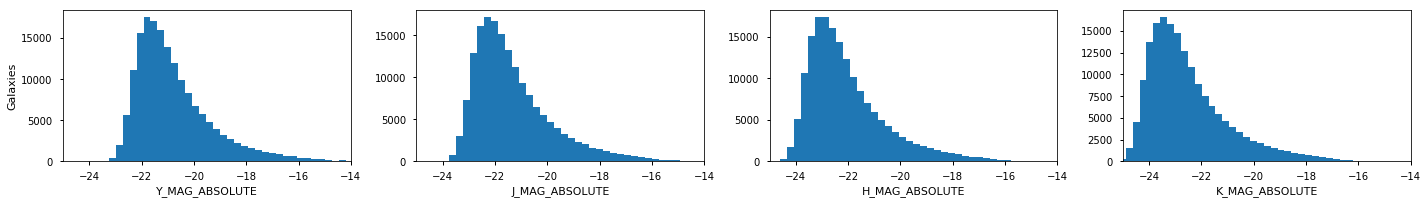

In [219]:
fig, axes = plt.subplots(ncols=len(ukidss_abs_mag_bands), figsize=(20, 3))
for axes_n, mag in enumerate(ukidss_abs_mag_bands):
    axes[axes_n].hist(remove_bad_values(data[mag]), bins=100)
    axes[axes_n].set_xlabel(mag)
    axes[axes_n].set_xlim([-25, -14])
axes[0].set_ylabel('Galaxies')
fig.tight_layout()

/data/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


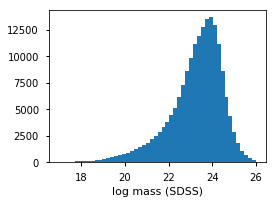

In [12]:
log_mass = np.log(remove_bad_values(data['ELPETRO_MASS']))
log_mass = log_mass[(log_mass > 17) & (log_mass < 26)]  # remove crazy tails

plt.clf()
fig, axes = plt.subplots(ncols=1, figsize=(4, 3))
axes.hist(log_mass, bins=n_bins)
axes.set_xlabel('log mass (SDSS)')
# axes[0].set_ylabel('Galaxies')
fig.tight_layout()

In [19]:
# NSA columns with 7 values are for FNugriz values
g_mag = - np.array(data['ELPETRO_ABSMAG'])[:, 3]
r_mag = - np.array(data['ELPETRO_ABSMAG'])[:, 4]
g_r_color = pd.Series(g_mag - r_mag)

color_mag_df = pd.DataFrame(data={'g_r_color': g_r_color, 'g_mag': g_mag})
color_mag_df = color_mag_df.dropna(how='any')
color_mag_df = color_mag_df[(color_mag_df['g_mag'] > 16) & (color_mag_df['g_mag'] < 22)]
color_mag_df = color_mag_df[(color_mag_df['g_r_color'] > -1.) & (color_mag_df['g_r_color'] < 0.)]

/data/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


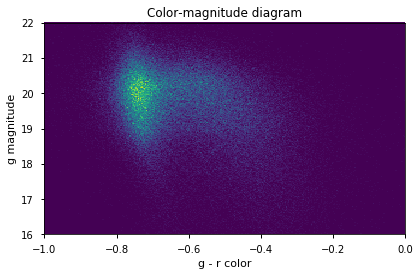

In [20]:
plt.hist2d(color_mag_df['g_r_color'], color_mag_df['g_mag'], bins=300)
plt.xlabel('g - r color')
plt.ylabel('g magnitude')
plt.title('Color-magnitude diagram')
plt.tight_layout()

0 of 182956 galaxies have bad/missing h-alpha OSSY values
7178 of 182956 galaxies have no h-alpha line


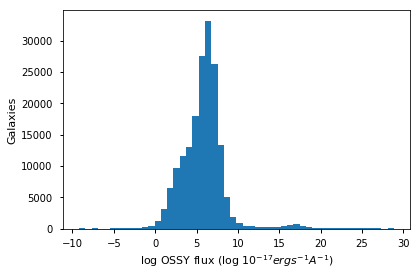

In [67]:
h_alpha_raw = pd.Series(data['HA_6562'])
h_alpha = remove_bad_values(h_alpha_raw)
print('{} of {} galaxies have bad/missing h-alpha OSSY values'.format(len(h_alpha) - len(h_alpha_raw), len(h_alpha_raw)))
print('{} of {} galaxies have no h-alpha line'.format(np.sum(h_alpha == 0), len(h_alpha)))
_ = plt.hist(np.log(h_alpha[h_alpha > 0]), bins=50)
plt.xlabel('log OSSY flux (log $10^{-17} erg s^{-1} A^{-1}$)')
plt.ylabel('Galaxies')
plt.tight_layout()

In [154]:
bpt_x = np.log10(data['NII_6583'] / data['HA_6562'])  # important to use log10 to get the right scaling
bpt_y = np.log10(data['OIII_5006'] / data['HB_4861'])

/data/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/data/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/data/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/data/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/data/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/data/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [262]:
bpt_df = pd.DataFrame(data={'bpt_x': bpt_x, 'bpt_y': bpt_y})
for band in ukidss_abs_mag_bands:
    bpt_df[band] = data[band]
bpt_df = bpt_df.replace([np.inf, -np.inf], np.nan)  # TODO should do much earlier
bpt_df = bpt_df.dropna(how='any')

In [263]:
bpt_df['K-Y'] = bpt_df['K_MAG_ABSOLUTE'] - bpt_df['Y_MAG_ABSOLUTE']

In [264]:
bpt_df.head()

bpt_x     bpt_y  Y_MAG_ABSOLUTE  J_MAG_ABSOLUTE  H_MAG_ABSOLUTE  \
0 -0.260307  0.038004      -20.906084      -21.470083      -22.247084   
2 -0.486340 -0.447821      -18.738657      -19.269657      -19.919659   
3 -0.148206  0.616469      -21.267052      -21.734053      -22.397052   
4  0.330365  0.787953      -22.145145      -22.834145      -23.542145   
5 -0.441684 -0.491621      -20.222704      -20.743704      -21.471704   

   K_MAG_ABSOLUTE       K-Y  
0      -22.700084 -1.794000  
2      -20.218659 -1.480001  
3      -22.867052 -1.600000  
4      -24.090145 -1.945000  
5      -21.885703 -1.662999

Kauffmann(2003) equation 1: 

$$\log(\frac{[O III]}{H\beta}) > \frac{0.61}{\log([N II]/H\alpha)−0.05} + 1.3$$


Kewley (2001) equation 5:
    
$$\log(\frac{[O III]}{H\beta}) = \frac{0.61}{\log([N II]/H\alpha)−0.47} + 1.19$$

In [222]:
def bpt_kauffmann(x):
    y = 0.61 / (x - 0.05) + 1.3
    y[x > 0] = np.nan  # mask anything near the asympote
    return y
    
def bpt_kewley(x):
    y = 0.61 / (x - 0.47) + 1.19
    y[x > 0.4] = np.nan
    return y

In [242]:
def zoom_bpt_diagram(df):
    return df[
    (df['bpt_x'] > -1.5) &
    (df['bpt_x'] < 0.5) &
    (df['bpt_y'] > -1.2) &
    (df['bpt_y'] < 1.2)
]

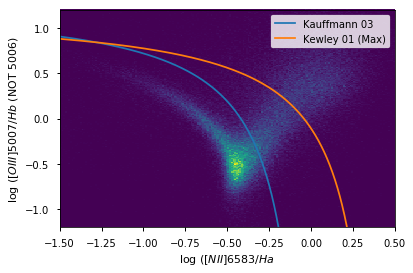

In [265]:
bpt_df_zoomed = zoom_bpt_diagram(bpt_df)
plt.hist2d(bpt_df_zoomed['bpt_x'], bpt_df_zoomed['bpt_y'], bins=200)
plt.xlabel('log ($[NII] 6583 / Ha$')
_ = plt.ylabel('log ($[OIII] 5007 / Hb$ (NOT 5006)')
x = np.linspace(-1.5, 0.5, 1000)
plt.plot(x, bpt_kauffmann(x))
plt.plot(x, bpt_kewley(x))
plt.legend(['Kauffmann 03', 'Kewley 01 (Max)'])


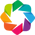

In [259]:
import holoviews as hv
hv.extension('bokeh')
from holoviews.operation.datashader import datashade
# from colorcet import fire
from matplotlib import cm
viridis = cm.get_cmap('viridis')

In [260]:
points = hv.Points(bpt_df_zoomed, ['bpt_x', 'bpt_y'])
img = datashade(points, cmap=viridis, width=1000, height=600)

In [261]:
img

/data/anaconda3/envs/py36/lib/python3.6/site-packages/holoviews/operation/datashader.py:358: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  if 'x_axis' in agg and 'y_axis' in agg:


:DynamicMap   []

In [237]:
import datashader as ds
import datashader.transfer_functions as tf

/data/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


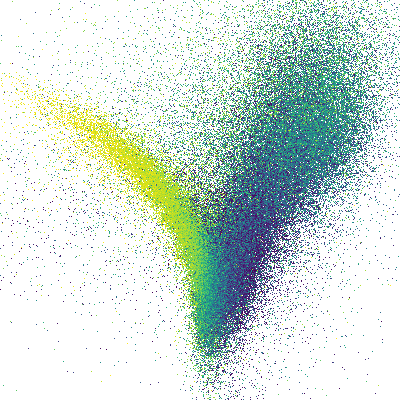

In [267]:
def show_bpt_colors(bpt_df):
    cvs = ds.Canvas(plot_width=400, plot_height=400)
    agg = cvs.points(zoom_bpt_diagram(bpt_df), 'bpt_x', 'bpt_y', ds.mean('K-Y'))
    img = tf.shade(agg, cmap=viridis)  # how=eq_hist, see below
    # 'assign a pixel color to each equal-sized histogram bin to ensure even usage of every displayable color'
    return img
show_bpt_colors(bpt_df)

In [289]:
definite_agn = bpt_df[
    (bpt_df['bpt_x'] > -0.25) &
    (bpt_df['bpt_y'] > 0)
]
not_agn = bpt_df[
    (bpt_df['bpt_x'] > -0.4)
]

In [297]:
fig, axes = plt.subplots(ncols=2)

definite_agn['Y_MAG_ABSOLUTE'].hist(ax=axes[0], histtype='step')
not_agn['Y_MAG_ABSOLUTE'].hist(ax=axes[0], histtype='step')

definite_agn['R_MAG_ABSOLUTE'].hist(ax=axes[0], histtype='step')
not_agn['R_MAG_ABSOLUTE'].hist(ax=axes[0], histtype='step')

ValueError: 'transform' must be an instance of 'matplotlib.transform.Transform'

## Misc


From SDSS:
`
SELECT *
FROM   SpecPhotoAll
WHERE  (z <= 0.15)
and (class = 'GALAXY')`  # should include QSO?


## WISE

WISE is already cross-matched into UKIDSS.

The recommended data release is the all-sky release: http://wise2.ipac.caltech.edu/docs/release/allsky/. This includes the AllWISE Source Catalog, introduced [here](http://wise2.ipac.caltech.edu/docs/release/allwise/expsup/sec1_3.html#src_cat), described [here](http://wise2.ipac.caltech.edu/docs/release/allwise/expsup/sec2_1.html). AllWISE has general access instructions [here](http://wise2.ipac.caltech.edu/docs/release/allwise/expsup/sec1_5.html).

I haven't looked into this yet.

> The UKIDSS project is defined in Lawrence et al 2007. UKIDSS uses the UKIRT Wide Field Camera (WFCAM; Casali et al 2007) and a photometric system described in Hewett et al 2006. The pipeline processing and science archive are described in Irwin et al (2008) and Hambly et al (2008). We have used data from the Xnd data release, which is described in detail in XX et al (200X)." 

Acknowledgement from http://wsa.roe.ac.uk/pubs.html